In [ ]:
! pip install optimum
! pip install auto-gptq

In [ ]:
from huggingface_hub import login
from google.colab import userdata
key = userdata.get('HuggingFace')

login(key)


In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM

model_name_or_path = "TheBloke/CapybaraHermes-2.5-Mistral-7B-GPTQ"
model = AutoModelForCausalLM.from_pretrained(model_name_or_path,
                                             device_map="auto",
                                             trust_remote_code=False,
                                             revision="main")

tokenizer = AutoTokenizer.from_pretrained(model_name_or_path, use_fast=True)

In [ ]:
# Load the model configuration
config = model.config

# Print the number of layers and heads
num_layers = config.num_hidden_layers  # or config.n_layer depending on the model type
num_attention_heads = config.num_attention_heads  # or config.n_head

print(f"Number of layers: {num_layers}")
print(f"Number of attention heads per layer: {num_attention_heads}")

In [ ]:
prompt = "What is the capital of France"
system_message = "You are a fact database"
prompt_template=f'''<|im_start|>system
{system_message}<|im_end|>
<|im_start|>user
{prompt}<|im_end|>
<|im_start|>assistant
'''

print("\n\n*** Generate:")

input_ids = tokenizer(prompt_template, return_tensors='pt').to('cuda')
output = model.generate(**input_ids, return_dict_in_generate=True, max_new_tokens=512 ,output_attentions=True)

In [ ]:
attentions = output['attentions']

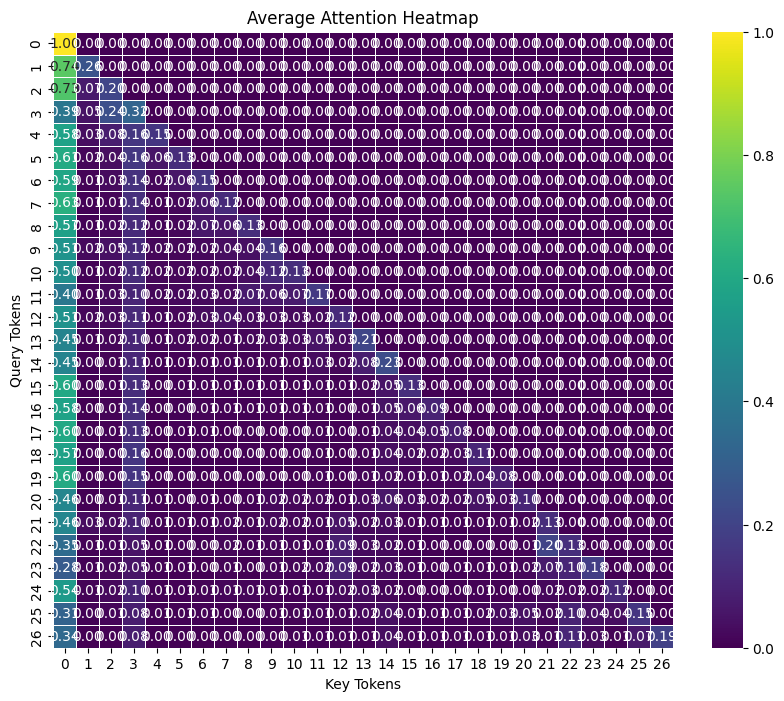

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming attentions[0] is a 4D tensor with shape (1, 32, 27, 27)
attention_matrix = attentions[0]  # Extract the attention matrix
# Average across all attention heads (axis=1)
attention_matrix_avg = attention_matrix[31].mean(dim=[0,1]).cpu().detach().numpy()
# Create the heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(attention_matrix_avg, cmap='viridis', annot=True, fmt='.2f', linewidths=0.5)

plt.title("Average Attention Heatmap")
plt.xlabel("Key Tokens")
plt.ylabel("Query Tokens")
plt.show()


In [ ]:
!pip install bertviz

In [ ]:
from bertviz import model_view, head_view

In [ ]:
tokens = tokenizer.convert_ids_to_tokens(input_ids['input_ids'][0])

In [ ]:
model_view(output['attentions'][0], tokens)

In [ ]:
input_ids

In [ ]:
head_view(output['attentions'][0], tokens)